In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
lecture = BayesNet()
lecture.load_from_bifxml('testing/lecture_example.BIFXML')

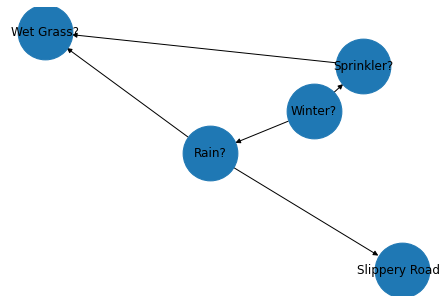

In [4]:
lecture.draw_structure()

In [5]:
lecture.get_all_variables()

['Winter?', 'Sprinkler?', 'Rain?', 'Wet Grass?', 'Slippery Road?']

In [6]:
lecture.get_all_cpts()

{'Winter?':    Winter?    p
 0    False  0.4
 1     True  0.6, 'Sprinkler?':    Winter?  Sprinkler?     p
 0    False       False  0.25
 1    False        True  0.75
 2     True       False  0.80
 3     True        True  0.20, 'Rain?':    Winter?  Rain?    p
 0    False  False  0.9
 1    False   True  0.1
 2     True  False  0.2
 3     True   True  0.8, 'Wet Grass?':    Sprinkler?  Rain?  Wet Grass?     p
 0       False  False       False  1.00
 1       False  False        True  0.00
 2       False   True       False  0.20
 3       False   True        True  0.80
 4        True  False       False  0.10
 5        True  False        True  0.90
 6        True   True       False  0.05
 7        True   True        True  0.95, 'Slippery Road?':    Rain?  Slippery Road?    p
 0  False           False  1.0
 1  False            True  0.0
 2   True           False  0.3
 3   True            True  0.7}

In [7]:
lecture.get_children('Rain?')

['Wet Grass?', 'Slippery Road?']

In [8]:
lecture.get_all_edges()

[('Winter?', 'Sprinkler?'),
 ('Winter?', 'Rain?'),
 ('Sprinkler?', 'Wet Grass?'),
 ('Rain?', 'Wet Grass?'),
 ('Rain?', 'Slippery Road?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(lecture)

In [10]:
x = ['Rain?']
y = ['Sprinkler?']
z = ['Winter?', 'Wet Grass?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

Mindegree heuristic: 


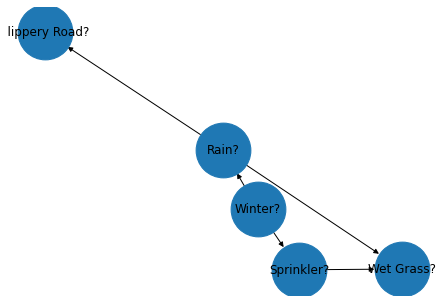

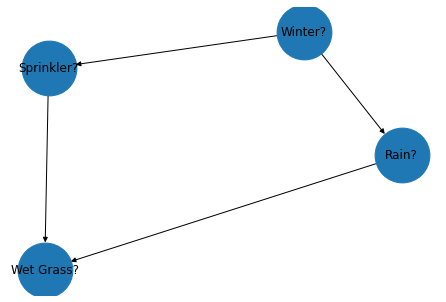

['Sprinkler?', 'Rain?']


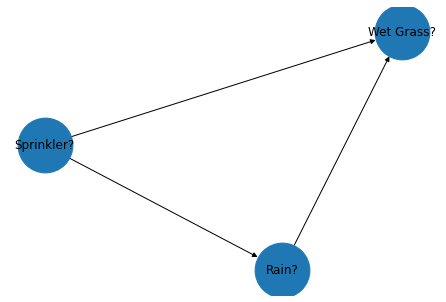

['Wet Grass?', 'Rain?']


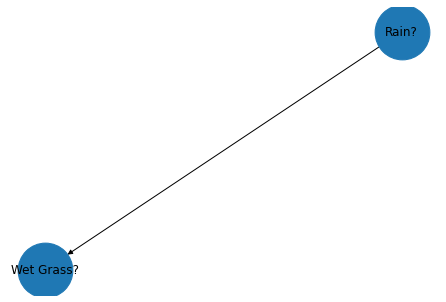

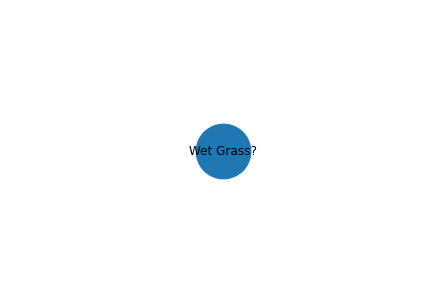

['Slippery Road?', 'Winter?', 'Sprinkler?', 'Rain?', 'Slippery Road?']

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree()

Minfull heuristic: 


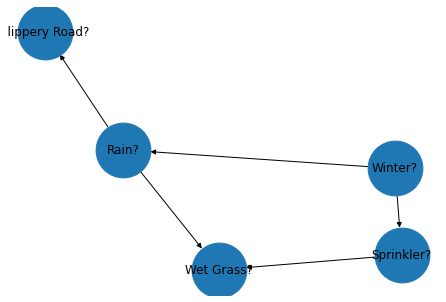

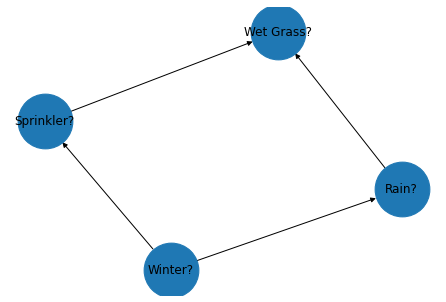

['Sprinkler?', 'Rain?']


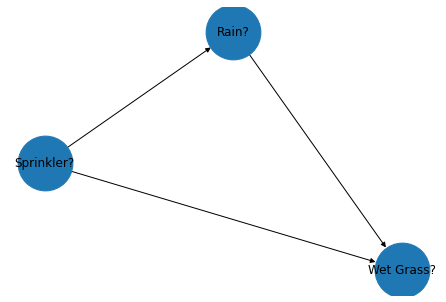

ValueError: min() arg is an empty sequence

In [12]:
print('Minfull heuristic: ')

reasoner.ordering_minfull()

# c) network pruning

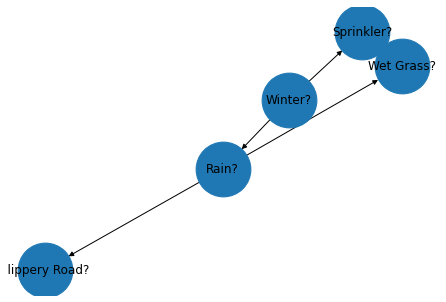

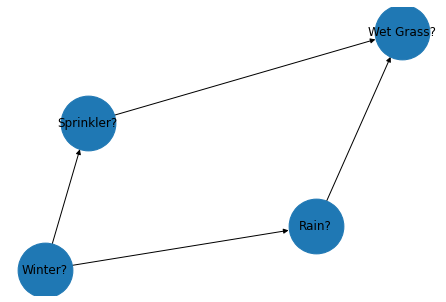

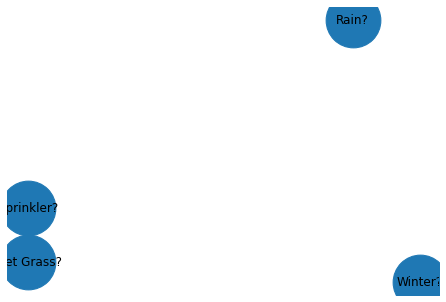

In [13]:
q = ['Wet Grass?']
e = pd.Series({'Winter?': True, 'Rain?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('Wet Grass?')

,Sprinkler?,Rain?,Wet Grass?,p
0,False,False,False,1.00
1,False,False,True,0.00
2,False,True,False,0.20
3,False,True,True,0.80
4,True,False,False,0.10
5,True,False,True,0.90
6,True,True,False,0.05
7,True,True,True,0.95


## d) Marginal distributions

### summing-out: 

In [ ]:
factor = lecture.get_cpt('Rain?')
factor

In [ ]:
reasoner.sum_out(factor, ['Winter?'])

### multiplying

In [ ]:
rain = lecture.get_cpt('Rain?')
rain

In [ ]:
winter = lecture.get_cpt('Winter?')
winter

In [ ]:
rain = lecture.get_cpt('Rain?')
winter = lecture.get_cpt('Winter?')

reasoner.multiply(rain, winter)

In [ ]:
reasoner.multiply(winter, rain)